## Case Study:  Telecom Churn

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### Step 1: Importing Python Library Files and CSV Data

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('telecom_churn_data.csv')

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### Step 2: Data Understandign and Exploration

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [6]:
#Creating a dataframe for Telecom Churn
telecom_data= df

In [7]:
telecom_data.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

### Step3: Missing values treatment

In [8]:
#Replacing all null /NaN values with Zero
telecom_data = telecom_data.replace(np.nan, 0)

In [9]:
round(100*(telecom_data.isnull().sum()/len(telecom_data.index)), 2)

mobile_number               0.0
circle_id                   0.0
loc_og_t2o_mou              0.0
std_og_t2o_mou              0.0
loc_ic_t2o_mou              0.0
last_date_of_month_6        0.0
last_date_of_month_7        0.0
last_date_of_month_8        0.0
last_date_of_month_9        0.0
arpu_6                      0.0
arpu_7                      0.0
arpu_8                      0.0
arpu_9                      0.0
onnet_mou_6                 0.0
onnet_mou_7                 0.0
onnet_mou_8                 0.0
onnet_mou_9                 0.0
offnet_mou_6                0.0
offnet_mou_7                0.0
offnet_mou_8                0.0
offnet_mou_9                0.0
roam_ic_mou_6               0.0
roam_ic_mou_7               0.0
roam_ic_mou_8               0.0
roam_ic_mou_9               0.0
roam_og_mou_6               0.0
roam_og_mou_7               0.0
roam_og_mou_8               0.0
roam_og_mou_9               0.0
loc_og_t2t_mou_6            0.0
loc_og_t2t_mou_7            0.0
loc_og_t

In [10]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00

In [11]:
# telecom data without date feilds
telecom_data= telecom_data.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'],1)

### Step 4: Identifying High Value Customers

In [12]:
#Creating a new column 'Total_data_rec_amt_6' which contains the product of recharge data and average recharge amount for 6th month
telecom_data['Total_data_rec_amt_6'] = telecom_data.total_rech_data_6 * telecom_data.av_rech_amt_data_6

In [13]:
#Creating a new column 'Total_data_rec_amt_7' which contains the product of recharge data and average recharge amount for 7th month
telecom_data['Total_data_rec_amt_7'] = telecom_data.total_rech_data_7 * telecom_data.av_rech_amt_data_7

In [14]:
#Creating Net Total Recharge Amount combining Data and Voice total recharge amount for 6th month
telecom_data['Total_net_rec_amt_6'] = telecom_data.Total_data_rec_amt_6 + telecom_data.total_rech_amt_6

In [15]:
#Creating Net Total Recharge Amount combining Data and Voice total recharge amount for 7th month
telecom_data['Total_net_rec_amt_7'] = telecom_data.Total_data_rec_amt_7 + telecom_data.total_rech_amt_7

In [16]:
#Creating new column for total no. of recharges for month 6
telecom_data['Total_no_rec_6'] = telecom_data.total_rech_num_6 + telecom_data.total_rech_data_6

In [17]:
#Creating new column for total no. of recharges for month 7
telecom_data['Total_no_rec_7'] = telecom_data.total_rech_num_7 + telecom_data.total_rech_data_7

In [18]:
#Creating Net Total Recharge Amount combining Data and Voice total recharge amount
telecom_data['Total_net_rec_amt_6_7'] = telecom_data.Total_net_rec_amt_6 + telecom_data.Total_net_rec_amt_7

In [19]:
#Creating Net Total Recharge Amount combining Data and Voice total recharge amount
telecom_data['Total_no_rec_6_7'] = telecom_data.Total_no_rec_6 + telecom_data.Total_no_rec_7

In [20]:
#Creating Net Total Recharge Amount combining Data and Voice total recharge amount
telecom_data['Total_avg_rec_amt_6_7'] = telecom_data.Total_net_rec_amt_6_7 / telecom_data.Total_no_rec_6_7

In [21]:
#check the 70th percentile of the average amt recharge
telecom_data.describe(percentiles=[.5, .6,.70, .95 ])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_data_rec_amt_6,Total_data_rec_amt_7,Total_net_rec_amt_6,Total_net_rec_amt_7,Total_no_rec_6,Total_no_rec_7,Total_net_rec_amt_6_7,Total_no_rec_6_7,Total_avg_rec_amt_6_7
count,9.999900e+04,99999.0,99999.0,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0

In [22]:
#Customers with more than 70th percentileof the average amount of recharge are considered high value customers (HVC)
telecom_data_hvc= telecom_data.loc[telecom_data.Total_avg_rec_amt_6_7>66.67] 

In [23]:
telecom_data_hvc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29903 entries, 0 to 99998
Columns: 223 entries, mobile_number to Total_avg_rec_amt_6_7
dtypes: float64(188), int64(35)
memory usage: 51.1 MB


### Step 5: Assigning Churn Tag and calculating Churn Rate

In [24]:
telecom_data_hvc['churn_label'] = np.where((telecom_data_hvc['total_ic_mou_9']==0) & (telecom_data_hvc['total_og_mou_9']==0) & (telecom_data_hvc['vol_2g_mb_9']==0)& (telecom_data_hvc['vol_3g_mb_9']==0), 1, 0)

In [25]:
telecom_data_hvc['churn_label']

0        1
7        1
9        0
13       0
19       0
20       0
23       0
24       0
33       0
34       0
35       1
39       0
40       0
41       0
47       0
48       0
51       0
52       0
56       0
57       0
64       0
67       1
69       0
70       0
71       0
73       0
77       0
86       1
87       0
92       0
96       0
101      0
102      0
103      0
105      0
115      0
121      0
131      0
133      0
134      0
136      0
144      1
145      0
146      0
147      0
149      0
150      0
154      0
156      0
157      0
158      0
164      0
165      0
170      0
172      0
173      0
175      0
176      0
177      0
184      0
185      0
188      1
191      0
192      0
193      0
195      0
202      1
203      0
204      0
206      0
208      0
218      0
220      0
222      1
223      0
226      0
235      0
240      0
241      0
242      0
245      0
246      0
248      0
252      0
253      0
255      0
256      0
265      0
270      0
275      1
276      1

In [26]:
#Keeping backup of telecom high value customer dataframe
telecom_data_hvc_bk = telecom_data_hvc

In [27]:
#Dropping all columns of month 9
telecom_data_hvc = telecom_data_hvc.drop(['arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9','total_og_mou_9','loc_ic_mou_9','std_ic_mou_9','total_ic_mou_9','spl_ic_mou_9','isd_ic_mou_9','ic_others_9','total_rech_num_9','total_rech_amt_9','max_rech_amt_9','last_day_rch_amt_9','total_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','av_rech_amt_data_9','vol_2g_mb_9','vol_3g_mb_9','arpu_3g_9','arpu_2g_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','sep_vbc_3g'],1)

In [28]:
### Checking the Churn Rate
print(sum(telecom_data_hvc['churn_label']))
print(len(telecom_data_hvc['churn_label'].index))

churn_rate = (sum(telecom_data_hvc['churn_label'])/len(telecom_data_hvc['churn_label'].index))*100
churn_rate

2490
29903


8.326923720028091

Churn Rate is approx. 8.5%

In [29]:
telecom_data_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29903 entries, 0 to 99998
Columns: 189 entries, mobile_number to churn_label
dtypes: float64(161), int32(1), int64(27)
memory usage: 43.2 MB


### Step 6: Calculate difference between 8th Month and previous months (i.e. 6th and 7th)

In [30]:
#Creating a new column 'Total_data_rec_amt_8' which contains the product of recharge data and average recharge amount for 8th month
telecom_data_hvc['Total_data_rec_amt_8'] = telecom_data_hvc.total_rech_data_8 * telecom_data_hvc.av_rech_amt_data_8

In [31]:
#Creating Net Total Recharge Amount combining Data and Voice total recharge amount for 8th month
telecom_data_hvc['Total_net_rec_amt_8'] = telecom_data_hvc.Total_data_rec_amt_8 + telecom_data_hvc.total_rech_amt_8

In [32]:
#Creating a column to store the difference in 8th month Recharge amount and the Average recharge amount for the 6th and 7th Month
telecom_data_hvc['Diff_8Month_avg_rec_amt_6_7'] =telecom_data_hvc.Total_net_rec_amt_8 - telecom_data_hvc.Total_avg_rec_amt_6_7

In [33]:
#telecom_data.describe(percentiles=[.5, .6,.70, .95 ])
telecom_data_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Total_data_rec_amt_6,Total_data_rec_amt_7,Total_net_rec_amt_6,Total_net_rec_amt_7,Total_no_rec_6,Total_no_rec_7,Total_net_rec_amt_6_7,Total_no_rec_6_7,Total_avg_rec_amt_6_7,churn_label,Total_data_rec_amt_8,Total_net_rec_amt_8,Diff_8Month_avg_rec_amt_6_7
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,252.0,252.0,614.0,504.0,5.0,4.0,1118.0,9.0,124.222222,1,252.0,504.0,379.777778
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14

### Step 7: Test Train Split

In [34]:
telecom_data_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Total_data_rec_amt_6,Total_data_rec_amt_7,Total_net_rec_amt_6,Total_net_rec_amt_7,Total_no_rec_6,Total_no_rec_7,Total_net_rec_amt_6_7,Total_no_rec_6_7,Total_avg_rec_amt_6_7,churn_label,Total_data_rec_amt_8,Total_net_rec_amt_8,Diff_8Month_avg_rec_amt_6_7
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,252.0,252.0,614.0,504.0,5.0,4.0,1118.0,9.0,124.222222,1,252.0,504.0,379.777778
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14

In [35]:
# Putting feature variable to X
X = telecom_data_hvc.drop(['churn_label','mobile_number','circle_id'], axis=1)

X.head()

# Putting response variable to y
y = telecom_data_hvc['churn_label']

y.head()

0     1
7     1
9     0
13    0
19    0
Name: churn_label, dtype: int32

In [36]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

#### Step 8: Principal Component Analysis

In [37]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [38]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [39]:
pca.components_

array([[-4.37550486e-17,  1.11022302e-16,  2.22044605e-16, ...,
         1.34188258e-01,  1.51720429e-01,  1.48356853e-01],
       [ 8.89927867e-17,  1.11022302e-16,  5.55111512e-17, ...,
        -4.30052232e-02,  9.25169862e-03,  8.79064350e-03],
       [ 1.50105366e-17, -4.16333634e-17, -2.22044605e-16, ...,
         3.95346995e-02,  3.77413328e-02,  4.17048072e-02],
       ...,
       [-0.00000000e+00,  1.65039681e-01,  7.54544187e-01, ...,
        -1.11121718e-02,  4.68151492e-02, -3.37967557e-02],
       [ 0.00000000e+00, -1.69945567e-01,  5.54858108e-02, ...,
        -1.27751437e-02,  8.91681159e-02, -7.37984480e-02],
       [-9.99999955e-01,  4.58929603e-05, -1.68588818e-05, ...,
         1.43118235e-06, -2.08500405e-05,  1.90043624e-05]])

In [40]:
X_train.shape

(20932, 189)

In [41]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'PC4':pca.components_[3], 'Feature':colnames})
pcs_df.head(16)

,PC1,PC2,PC3,PC4,Feature
0,-4.375505e-17,8.899279e-17,1.501054e-17,2.706316e-19,loc_og_t2o_mou
1,1.110223e-16,1.110223e-16,-4.163336e-17,-2.276825e-17,std_og_t2o_mou
2,2.220446e-16,5.551115e-17,-2.220446e-16,-2.376571e-16,loc_ic_t2o_mou
3,9.350362e-02,1.366940e-01,1.516729e-02,8.312686e-02,arpu_6
4,1.010102e-01,1.422722e-01,2.157396e-02,9.105012e-02,arpu_7
5,9.810973e-02,1.392043e-01,8.209666e-03,8.274583e-02,arpu_8
6,7.493148e-03,1.174121e-01,9.314542e-02,3.972807e-02,onnet_mou_6
7,1.013332e-02,1.268583e-01,1.034577e-01,4.580474e-02,onnet_mou_7
8,1.403609e-02,1.248390e-01,9.316856e-02,4.385296e-02,onnet_mou_8
9,2.173913e-02,1.583254e-01,5.529552e-02,3.471310e-02,offnet_mou_6


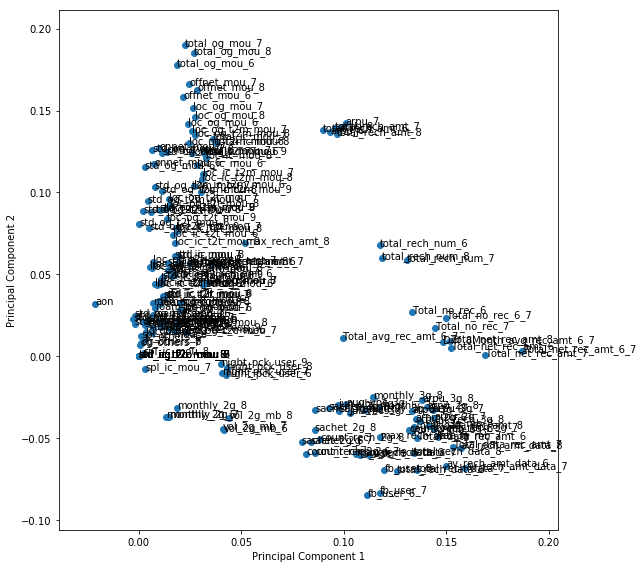

In [42]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [43]:
pca.explained_variance_ratio_

array([1.18975775e-01, 1.00637858e-01, 6.74562416e-02, 5.42923751e-02,
       3.53158207e-02, 3.21718143e-02, 2.68197451e-02, 2.54011344e-02,
       2.37737568e-02, 2.16479254e-02, 2.14603721e-02, 1.92084602e-02,
       1.82018670e-02, 1.69372378e-02, 1.66606503e-02, 1.58731299e-02,
       1.48719120e-02, 1.43663377e-02, 1.35993467e-02, 1.33608324e-02,
       1.18520705e-02, 1.08763713e-02, 1.08533248e-02, 1.05132927e-02,
       9.95799326e-03, 9.83582142e-03, 9.09338011e-03, 8.37356824e-03,
       7.87858061e-03, 7.33961586e-03, 6.74981614e-03, 6.61911249e-03,
       6.41833299e-03, 6.14209893e-03, 6.00808008e-03, 5.92505198e-03,
       5.63281875e-03, 5.45094381e-03, 5.17712085e-03, 5.07681247e-03,
       4.87288168e-03, 4.75947189e-03, 4.67077054e-03, 4.53762175e-03,
       4.33511427e-03, 4.28693735e-03, 4.13473886e-03, 3.96994789e-03,
       3.82868277e-03, 3.73494358e-03, 3.65595263e-03, 3.53307552e-03,
       3.46302531e-03, 3.40107158e-03, 3.38531383e-03, 3.21423268e-03,
      

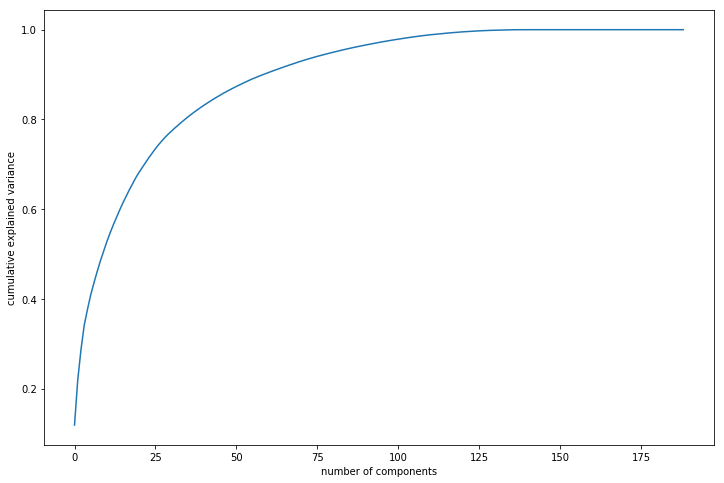

In [44]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [45]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=16)

In [46]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20932, 16)

In [47]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

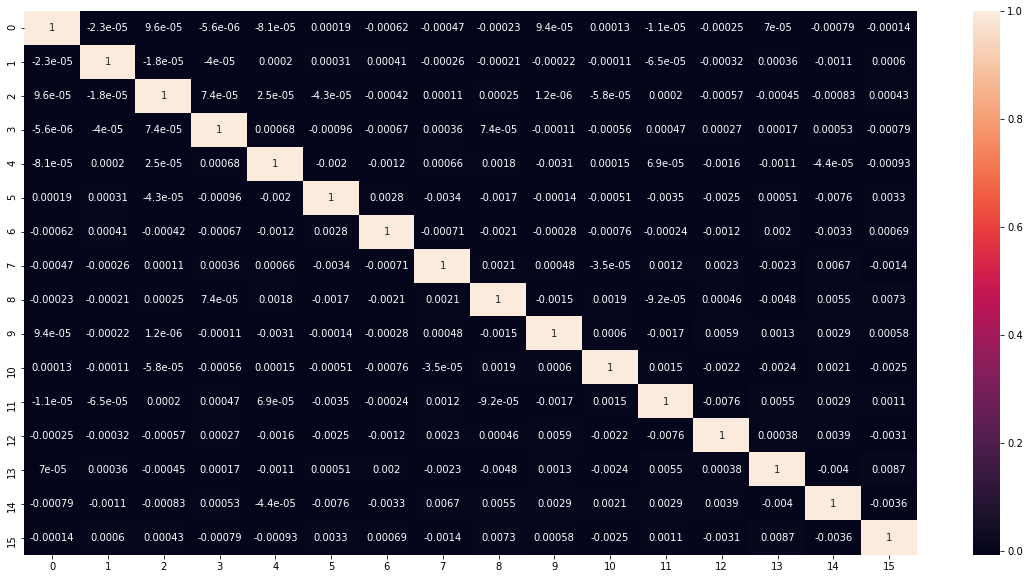

In [48]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [49]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.00873107488408955 , min corr:  -0.00762315957104837


In [50]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8971, 16)

In [51]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [52]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.86'

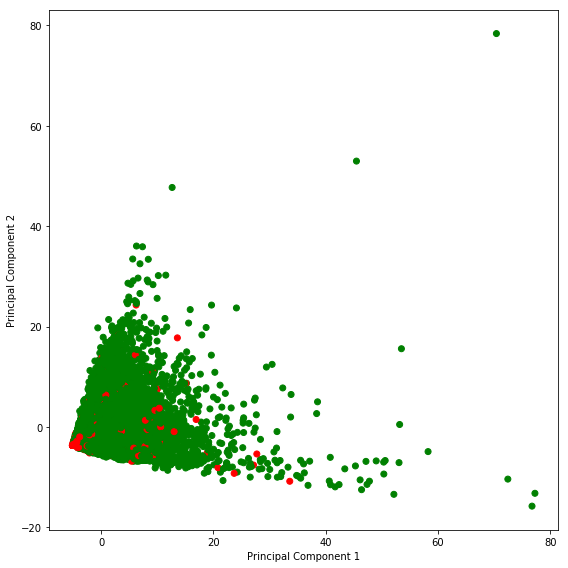

In [53]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [54]:
pca_last = PCA(n_components=16)
df_train_pca3 = pca_last.fit_transform(X_train)
df_test_pca3 = pca_last.transform(X_test)
df_test_pca3.shape

(8971, 16)

### Step 9: Applying a logistic regression on our Principal Components

In [55]:
#training the regression model
from sklearn.linear_model import LogisticRegression
learner_pca3 = LogisticRegression()
model_pca3 = learner_pca3.fit(df_train_pca3,y_train)


##### ROC and AUC score

**Note**

Note that we are fitting the original variable y with the transformed variables (principal components). This is not a problem becuase the transformation done in PCA is *linear*, which implies that you've only changed the way the new x variables are represented, though the nature of relationship between X and Y is still linear. 

In [56]:
#Making prediction on the test data
pred_probs_test3 = model_pca3.predict_proba(df_test_pca3)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test3))

'0.86'

#### Hyper parameter tuning

#### Ridge Regression

In [57]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:   36.6s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [58]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.237514,0.040361,0.0030,0.000632,0.0001,{'alpha': 0.0001},-0.154899,-0.152429,-0.158450,-0.152945,-0.149116,-0.155469,-0.153422,-0.149246,-0.158216,-0.151411,-0.153560,0.003093,3,-0.151277,-0.152613,-0.150400,-0.152269,-0.152819,-0.151946,-0.152782,-0.152279,-0.150656,-0.152006,-0.151905,0.000813
1,0.191611,0.012886,0.0023,0.000781,0.001,{'alpha': 0.001},-0.155831,-0.153494,-0.159350,-0.153861,-0.150194,-0.156360,-0.154591,-0.150283,-0.158976,-0.152381,-0.154532,0.003017,6,-0.152222,-0.153541,-0.151331,-0.153213,-0.153810,-0.152893,-0.153723,-0.153261,-0.151634,-0.152963,-0.152859,0.000816
2,0.161809,0.021941,0.0023,0.000640,0.01,{'alpha': 0.01},-0.155955,-0.153635,-0.159475,-0.153990,-0.150345,-0.156485,-0.154747,-0.150422,-0.159082,-0.152517,-0.154665,0.003007,17,-0.152354,-0.153669,-0.151460,-0.153343,-0.153947,-0.153026,-0.153851,-0.153395,-0.151770,-0.153095,-0.152991,0.000816
3,0.131207,0.017782,0.0017,0.000458,0.05,{'alpha': 0.05},-0.155965,-0.153648,-0.159485,-0.154002,-0.150358,-0.156496,-0.154762,-0.150434,-0.159087,-0.152529,-0.154677,0.003005,27,-0.152365,-0.153681,-0.151472,-0.153355,-0.153960,-0.153038,-0.153863,-0.153407,-0.151783,-0.153108,-0.153003,0.000816
4,0.119507,0.010269,0.0016,0.000490,0.1,{'alpha': 0.1},-0.155965,-0.153650,-0.159486,-0.154004,-0.150360,-0.156497,-0.154766,-0.150435,-0.159082,-0.152530,-0.154677,0.003004,28,-0.152367,-0.153683,-0.151474,-0.153356,-0.153961,-0.153040,-0.153864,-0.153408,-0.151785,-0.153110,-0.153005,0.000816


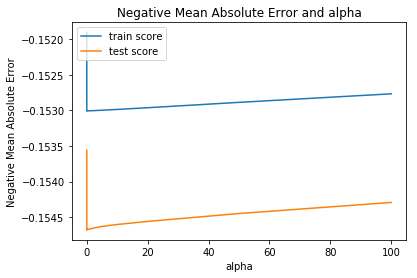

In [59]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [60]:
alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.        ,  0.        ,  0.        ,  0.02403814,  0.01318386,
       -0.0242516 ,  0.00654171,  0.00702951, -0.00197597, -0.00213862,
        0.00106549, -0.00100456,  0.00789331,  0.00257432,  0.00399804,
        0.00111385,  0.01258033,  0.0054086 , -0.00353199, -0.00086605,
       -0.0048969 , -0.00833763,  0.0015181 , -0.00063705,  0.00433118,
       -0.01987108,  0.00046983,  0.00172683,  0.00045419, -0.00801195,
       -0.00292723,  0.00098852,  0.00282339, -0.00712158, -0.00103192,
       -0.00084099, -0.0001595 ,  0.00207267,  0.00286899, -0.00459309,
       -0.03149962,  0.00541499,  0.00588124,  0.00176171, -0.03038546,
       -0.00087622,  0.00387964, -0.00149121, -0.00797658,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00489464,  0.00584622,
       -0.00177318, -0.00361922,  0.00279427, -0.00436826,  0.00560015,
        0.00146618, -0.00633748, -0.00258593,  0.00112481,  0.00113067,
        0.00334561,  0.00468964, -0.00202333, -0.00169384,  0.00

In [61]:
from sklearn import metrics

# predict
y_train_pred = ridge.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.2251428987614401
0.22790817042901357


#### Lasso Regression

In [62]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  1.2min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

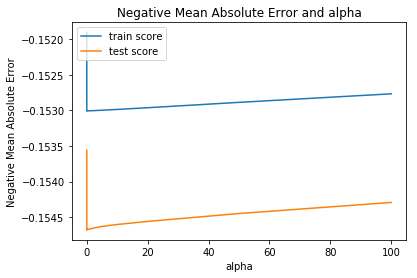

In [63]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Step 10: Random Forests

In [64]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [65]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
# Making predictions
predictions = rfc.predict(X_test)

In [67]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [68]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00      8201
          1       0.96      0.95      0.95       770

avg / total       0.99      0.99      0.99      8971



In [69]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8172   29]
 [  42  728]]


In [70]:
print(accuracy_score(y_test,predictions))

0.9920856091851522


### Step 11: Summary

After comparing the accuracy of Logistic Regression (86%) and Random Forests (99%) we can safely say that Random forest is far better in predicting the churn outcomem

The following 16 features play a major role in predicting the Churn:
1. loc_og_t2o_mou
2. std_og_t2o_mou
3. loc_ic_t2o_mou
4. arpu_6
5. arpu_7
6. arpu_8
7. onnet_mou_6
8. onnet_mou_7
9. onnet_mou_8
10. offnet_mou_6
11. offnet_mou_7
12. offnet_mou_8
13. roam_ic_mou_6
14. roam_ic_mou_7
15. roam_ic_mou_8
16. roam_og_mou_6